In [1]:
import sys
sys.path.append("../")

In [2]:
from utils.helper_functions import *

In [3]:
%load_ext autoreload
%autoreload 2

## Load Data

In [4]:
speeches = pandas.read_excel(r"../data/presidential_speeches.xlsx")
speeches = speeches.rename(columns={'Unnamed: 0': 'title', 'President': 'president', 'Date': 'date', 'Speech': 'text'})
speeches['subtype'] = 'Speech'
speeches['tokenized_sents'] = speeches['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
speeches['normalized_sents'] = speeches['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
print(speeches.shape)
speeches.head(2)

(382, 7)


,title,president,date,text,subtype,tokenized_sents,normalized_sents
0,january-20-2021-inaugural-address,Joe Biden,"January 20, 2021","\n \n\n\n\n\n\nChief Justice Roberts, Vic...",Speech,"[[Chief, Justice, Roberts, Vice, President, Ha...","[[chief, justice, roberts, vice, president, ha..."
1,january-19-2021-farewell-address,Donald Trump,"January 19, 2021",\n \n\n\n\n\n\nMy fellow Americans: Four ...,Speech,"[[My, fellow, Americans, Four, years, ago, we,...","[[fellow, americans, year, ago, launch, great,..."


In [5]:
orders = pandas.read_csv("../data/full_exec_orders_text.csv")
orders = orders.rename(columns={'publication_date': 'date', 'order_text': 'text'})
orders = orders[orders['text'].notna()]
orders['tokenized_sents'] = orders['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
orders['normalized_sents'] = orders['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
print(orders.shape)
orders.head(2)

(1074, 19)


,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,date,signing_date,start_page,title,disposition_notes,executive_order_number,president,text,tokenized_sents,normalized_sents
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[[Title, 3], [The, President, Executive, Order...","[[title], [president, executive, order, januar..."
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201...","[[Executive, Order, 13762, of, January, 13, 20...","[[executive, order, january], [provide, order,..."


In [6]:
data = speeches.append(orders[['title', 'president', 'date', 'text', 'subtype']])
data = data[data['text'].notna()]
data['tokenized_sents'] = data['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
data['normalized_sents'] = data['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
print(data.shape)
data.head(2)

(1456, 7)


,title,president,date,text,subtype,tokenized_sents,normalized_sents
0,january-20-2021-inaugural-address,Joe Biden,"January 20, 2021","\n \n\n\n\n\n\nChief Justice Roberts, Vic...",Speech,"[[Chief, Justice, Roberts, Vice, President, Ha...","[[chief, justice, roberts, vice, president, ha..."
1,january-19-2021-farewell-address,Donald Trump,"January 19, 2021",\n \n\n\n\n\n\nMy fellow Americans: Four ...,Speech,"[[My, fellow, Americans, Four, years, ago, we,...","[[fellow, americans, year, ago, launch, great,..."


In [8]:
colordict = {
'Speech': 'red',
'Executive Order': 'orange'
    }
colors_a = [colordict[c] for c in data['subtype']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('Speech', 'red'), ('Executive Order', 'orange')])


## K-Means Clustering Speeches vs. Executive Orders

Number of clusters:  2


Evaluation Metrics: 
Homogeneity: 0.962
Completeness: 0.968
V-measure: 0.965
Adjusted Rand Score: 0.986


Top terms per cluster:
Cluster 0:
 agency
 amended
 council
 director
 presidential
 register
 property
 pursuant
 information
 services


Cluster 1:
 people
 world
 american
 peace
 ve
 applause
 know
 new
 years
 country






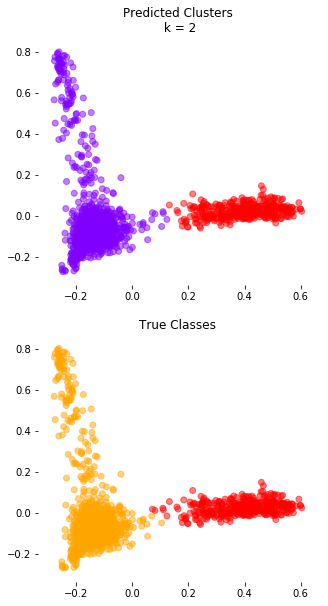

Number of clusters:  3


Evaluation Metrics: 
Homogeneity: 0.963
Completeness: 0.639
V-measure: 0.768
Adjusted Rand Score: 0.732


Top terms per cluster:
Cluster 0:
 people
 world
 american
 peace
 ve
 applause
 know
 new
 years
 country


Cluster 1:
 agency
 amended
 council
 director
 presidential
 committee
 information
 register
 board
 commission


Cluster 2:
 property
 schedule
 pursuant
 blocked
 ieepa
 emergency
 persons
 treasury
 entity
 50






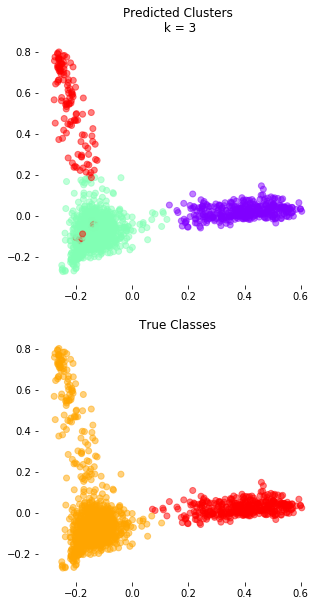

Number of clusters:  4


Evaluation Metrics: 
Homogeneity: 0.970
Completeness: 0.508
V-measure: 0.667
Adjusted Rand Score: 0.583


Top terms per cluster:
Cluster 0:
 people
 world
 american
 peace
 ve
 applause
 new
 know
 years
 country


Cluster 1:
 agency
 council
 director
 amended
 information
 committee
 consistent
 health
 commission
 services


Cluster 2:
 property
 pursuant
 blocked
 ieepa
 treasury
 persons
 emergency
 interests
 entity
 prohibitions


Cluster 3:
 register
 presidential
 schedule
 documents
 page
 1996
 volume
 pay
 1997
 1998






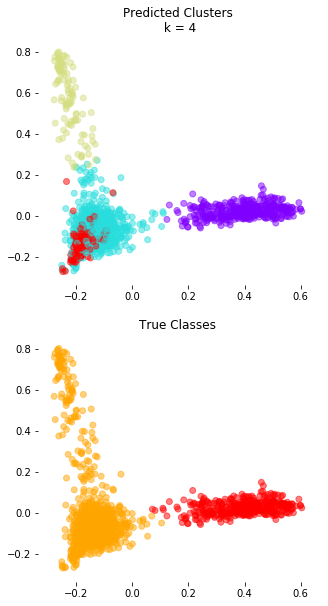

In [9]:
for num in (2,3,4):
    print("Number of clusters: ", num)
    targetDF = data
    textColumn = 'text'
    numCategories = num
    print("\n")
    dataTFVectorizer, dataTFVects, dataKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
    print("\n")
    top_words_by_cluster(dataTFVectorizer, dataKM, numCategories)
    print("\n")
    viz_2D(dataTFVects, dataKM, numCategories, colors_a=colors_a, figsize=(5,10))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


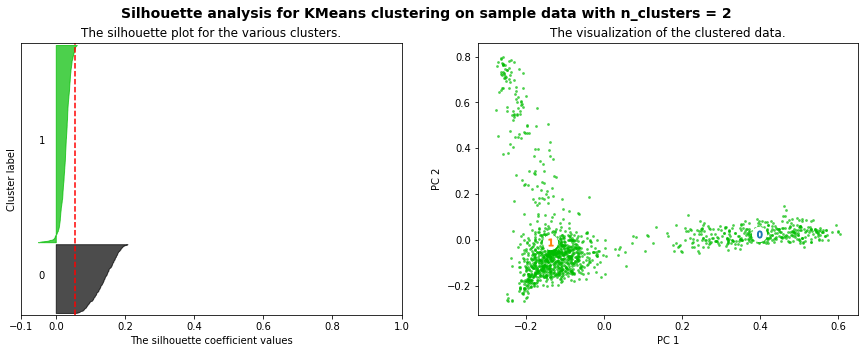

For n_clusters = 2, The average silhouette_score is : 0.056


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


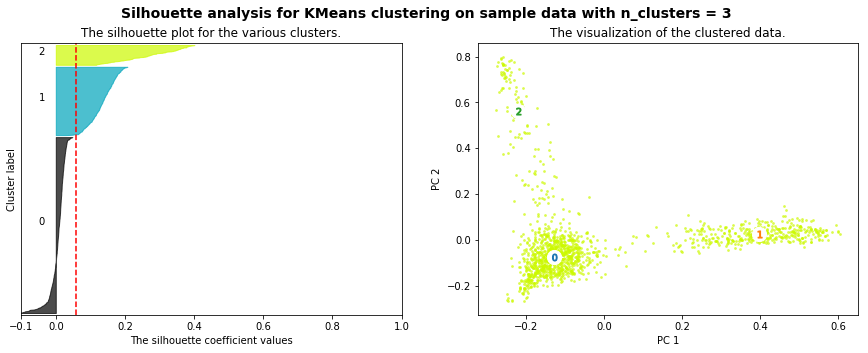

For n_clusters = 3, The average silhouette_score is : 0.059


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


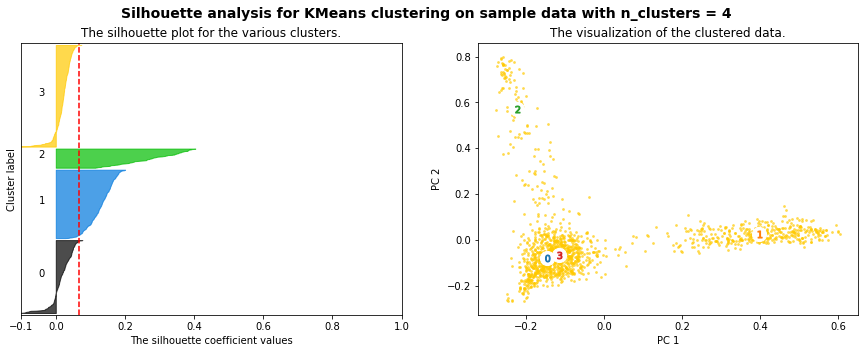

For n_clusters = 4, The average silhouette_score is : 0.066


In [10]:
dataPCA = sklearn.decomposition.PCA(n_components = 2).fit(dataTFVects.toarray())
reducedPCA_data = dataPCA.transform(dataTFVects.toarray())
for n_cluster in (2,3,4):
    X = dataTFVects.toarray()
    plotSilhouette(n_cluster, X, reducedPCA_data, dataPCA)

Number of clusters:  2


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 applause
 laughter
 jobs
 got
 ll
 energy
 workers
 tax
 care
 lot


Cluster 1:
 vietnam
 tonight
 tax
 soviet
 federal
 iraq
 rights
 union
 south
 budget






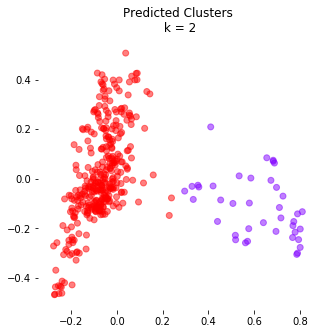

Number of clusters:  3


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 applause
 laughter
 jobs
 got
 ll
 energy
 workers
 tax
 care
 lot


Cluster 1:
 tonight
 tax
 soviet
 iraq
 federal
 rights
 energy
 jobs
 union
 budget


Cluster 2:
 vietnam
 south
 viet
 nam
 vietnamese
 north
 asia
 aggression
 hanoi
 shall






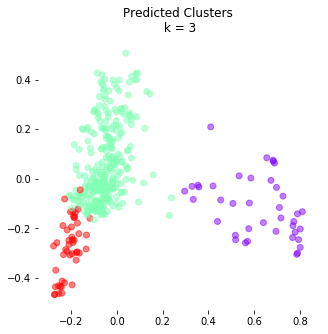

Number of clusters:  4


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 tax
 tonight
 federal
 budget
 jobs
 energy
 health
 ll
 percent
 care


Cluster 1:
 vietnam
 south
 viet
 nam
 vietnamese
 north
 asia
 aggression
 hanoi
 general


Cluster 2:
 applause
 laughter
 jobs
 got
 ll
 energy
 workers
 tax
 care
 lot


Cluster 3:
 soviet
 iraq
 rights
 nuclear
 justice
 union
 weapons
 democracy
 europe
 general






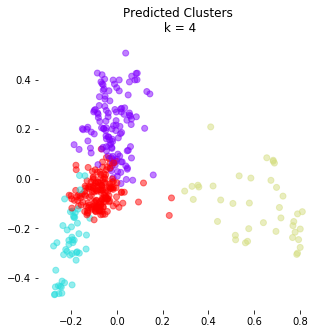

In [11]:
for num in (2,3,4):
    print("Number of clusters: ", num)
    targetDF = speeches
    textColumn = 'text'
    numCategories = num
    print("\n")
    dataTFVectorizer, dataTFVects, dataKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
    print("\n")
    top_words_by_cluster(dataTFVectorizer, dataKM, numCategories)
    print("\n")
    viz_2D(dataTFVects, dataKM, numCategories, figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


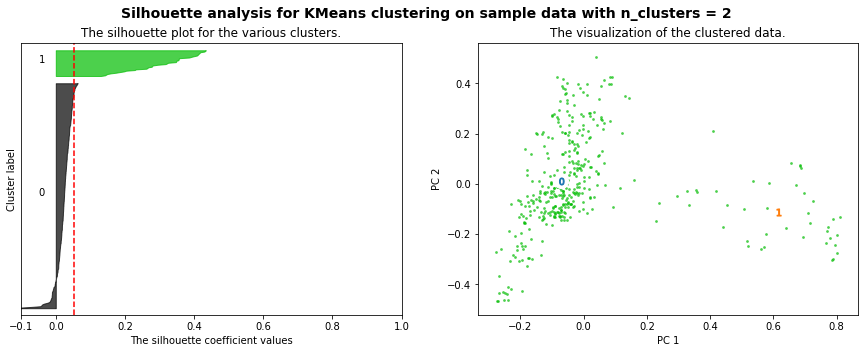

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 2, The average silhouette_score is : 0.052


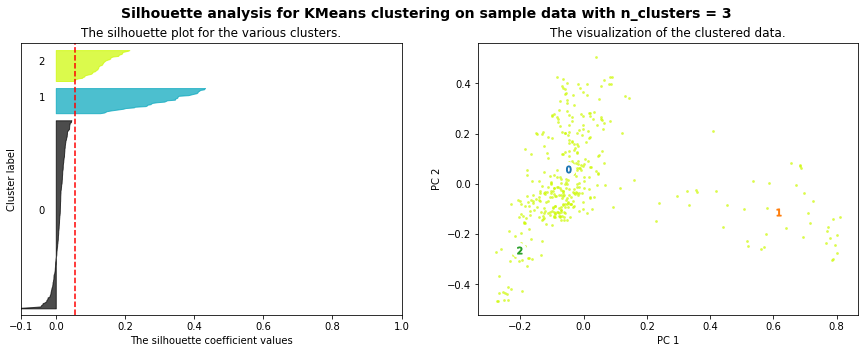

For n_clusters = 3, The average silhouette_score is : 0.055


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


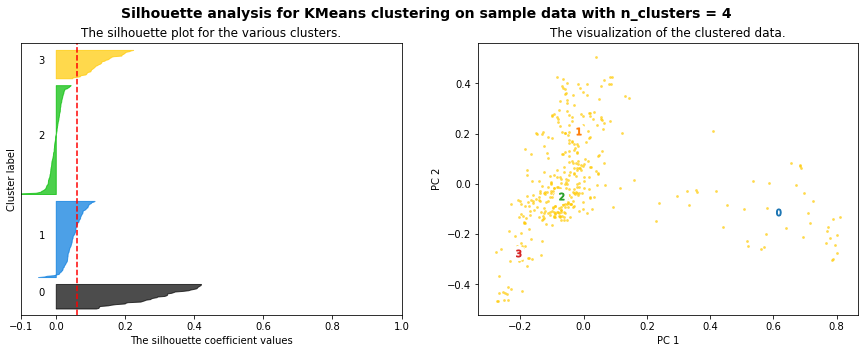

For n_clusters = 4, The average silhouette_score is : 0.060


In [12]:
dataPCA = sklearn.decomposition.PCA(n_components = 2).fit(dataTFVects.toarray())
reducedPCA_data = dataPCA.transform(dataTFVects.toarray())
for n_cluster in (2,3,4):
    X = dataTFVects.toarray()
    plotSilhouette(n_cluster, X, reducedPCA_data, dataPCA)

Number of clusters:  2


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 council
 security
 committee
 presidential
 information
 commission
 health
 register
 board
 force


Cluster 1:
 property
 blocked
 pursuant
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity






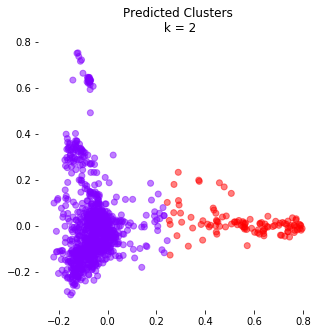

Number of clusters:  3


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 property
 blocked
 pursuant
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity


Cluster 1:
 register
 presidential
 schedule
 documents
 page
 pay
 volume
 1996
 1997
 1998


Cluster 2:
 council
 security
 information
 health
 committee
 task
 force
 commission
 board
 service






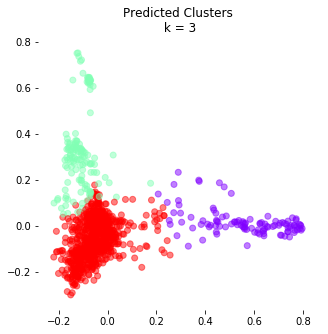

Number of clusters:  4


Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


Top terms per cluster:
Cluster 0:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 judges


Cluster 1:
 register
 presidential
 board
 documents
 december
 page
 inserting
 1998
 volume
 1996


Cluster 2:
 council
 information
 security
 committee
 task
 health
 force
 commission
 advisory
 provide


Cluster 3:
 property
 blocked
 pursuant
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity






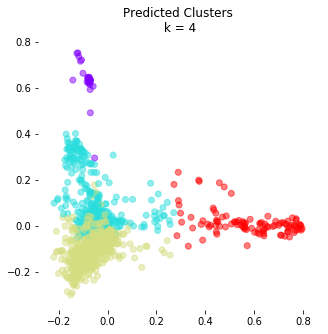

In [13]:
for num in (2,3,4):
    print("Number of clusters: ", num)
    targetDF = orders
    textColumn = 'text'
    numCategories = num
    print("\n")
    dataTFVectorizer, dataTFVects, dataKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
    print("\n")
    top_words_by_cluster(dataTFVectorizer, dataKM, numCategories)
    print("\n")
    viz_2D(dataTFVects, dataKM, numCategories, figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


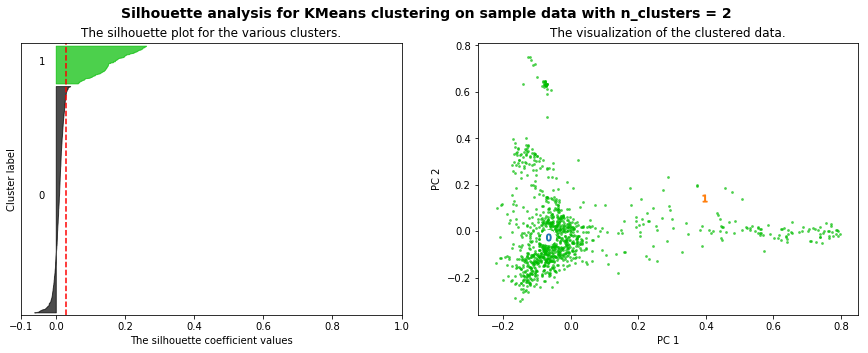

For n_clusters = 2, The average silhouette_score is : 0.029


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


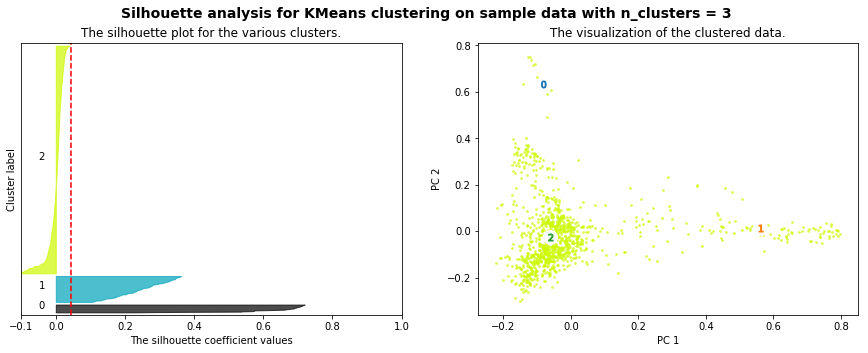

For n_clusters = 3, The average silhouette_score is : 0.044


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


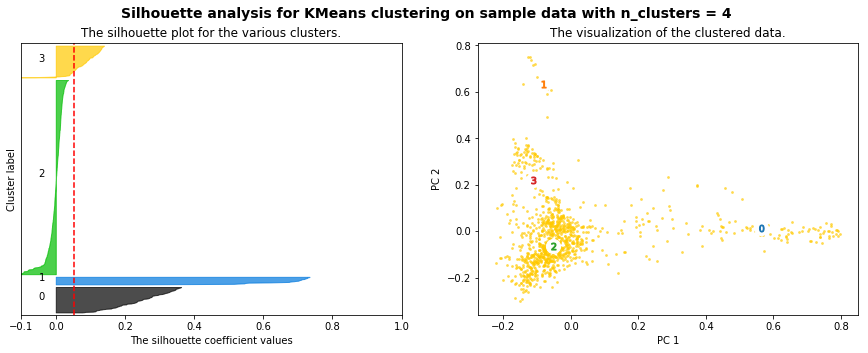

For n_clusters = 4, The average silhouette_score is : 0.051


In [14]:
dataPCA = sklearn.decomposition.PCA(n_components = 2).fit(dataTFVects.toarray())
reducedPCA_data = dataPCA.transform(dataTFVects.toarray())
for n_cluster in (2,3,4):
    X = dataTFVects.toarray()
    plotSilhouette(n_cluster, X, reducedPCA_data, dataPCA)

Evaluation Metrics: 
Homogeneity: 0.962
Completeness: 0.968
V-measure: 0.965
Adjusted Rand Score: 0.986
Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000
Evaluation Metrics: 
Homogeneity: 1.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Score: 0.000


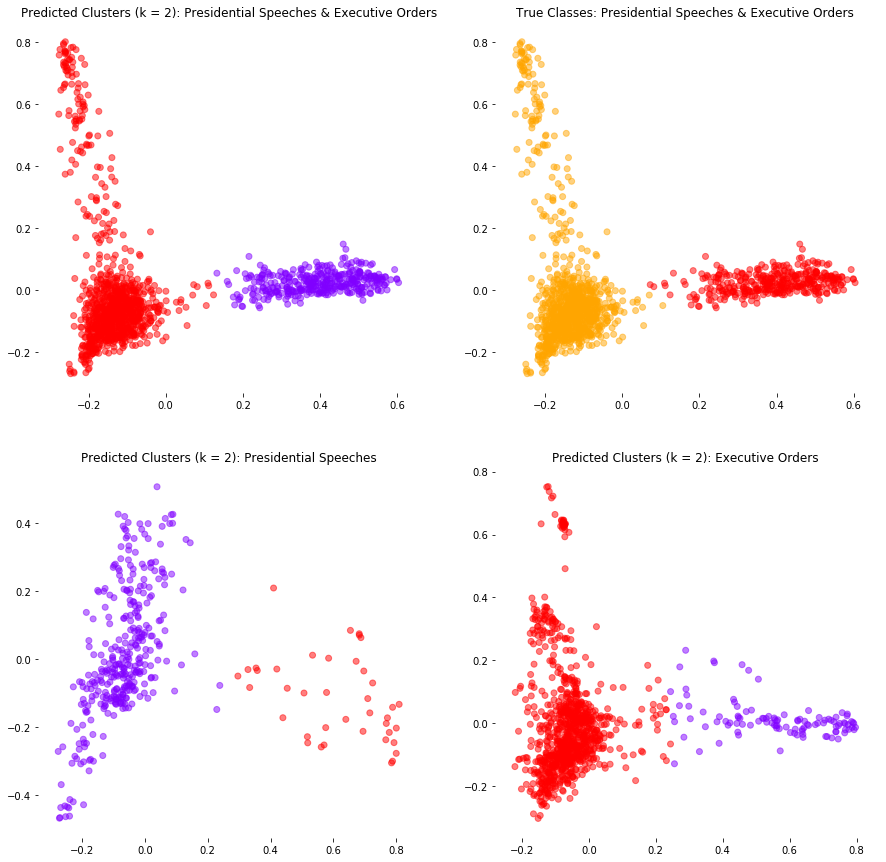

In [15]:
textColumn = 'text'
numCategories = 2
colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))

targetDF = data
dataTFVectorizer, dataTFVects, dataKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
dataPCA = sklearn.decomposition.PCA(n_components = 2).fit(dataTFVects.toarray())
reducedPCA_data = dataPCA.transform(dataTFVects.toarray())
colors_p_data = [colors[l] for l in dataKM.labels_]

targetDF = speeches
speechTFVectorizer, speechTFVects, speechKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
speechPCA = sklearn.decomposition.PCA(n_components = 2).fit(speechTFVects.toarray())
reducedPCA_speech = speechPCA.transform(speechTFVects.toarray())
colors_p_speech = [colors[l] for l in speechKM.labels_]

targetDF = orders
orderTFVectorizer, orderTFVects, orderKM = KMeans_helper(targetDF, 'subtype', textColumn, numCategories)
orderPCA = sklearn.decomposition.PCA(n_components = 2).fit(orderTFVects.toarray())
reducedPCA_order = orderPCA.transform(orderTFVects.toarray())
colors_p_order = [colors[l] for l in orderKM.labels_]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
ax1.title.set_text('Predicted Clusters (k = 2): Presidential Speeches & Executive Orders')
ax1.set_frame_on(False)
ax1.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p_data, alpha = 0.5)

ax2.title.set_text('True Classes: Presidential Speeches & Executive Orders')
ax2.set_frame_on(False)
ax2.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_a, alpha = 0.5)

ax3.title.set_text('Predicted Clusters (k = 2): Presidential Speeches')
ax3.set_frame_on(False)
ax3.scatter(reducedPCA_speech[:, 0], reducedPCA_speech[:, 1], color = colors_p_speech, alpha = 0.5)

ax4.title.set_text('Predicted Clusters (k = 2): Executive Orders')
ax4.set_frame_on(False)
ax4.scatter(reducedPCA_order[:, 0], reducedPCA_order[:, 1], color = colors_p_order, alpha = 0.5)

fig.savefig('clusters.png', dpi=fig.dpi)

# Word Embeddings by Year (2000-2020)

In [16]:
import seaborn

In [17]:
data['year'] = data['date'].str[-4:]
speeches['year'] = speeches['date'].str[-4:]
orders['year'] = orders['date'].str[-4:]

In [18]:
orders['year'].unique()

array(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '2021', '2020', '2019', '2018', '1999', '1998',
       '1997', '1996', '1995', '1994'], dtype=object)

In [19]:
data_recent = data[data['year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])]      
speech_recent = speeches[speeches['year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])]      
order_recent = orders[orders['year'].isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])]      

In [20]:
datarawEmbeddings, datacomparedEmbeddings = compareModels(data_recent, 'year', text_column_name='normalized_sents')
speechrawEmbeddings, speechcomparedEmbeddings = compareModels(speech_recent, 'year', text_column_name='normalized_sents')
orderrawEmbeddings, ordercomparedEmbeddings = compareModels(order_recent, 'year', text_column_name='normalized_sents')

president
regulation
economy
health
energy
equity


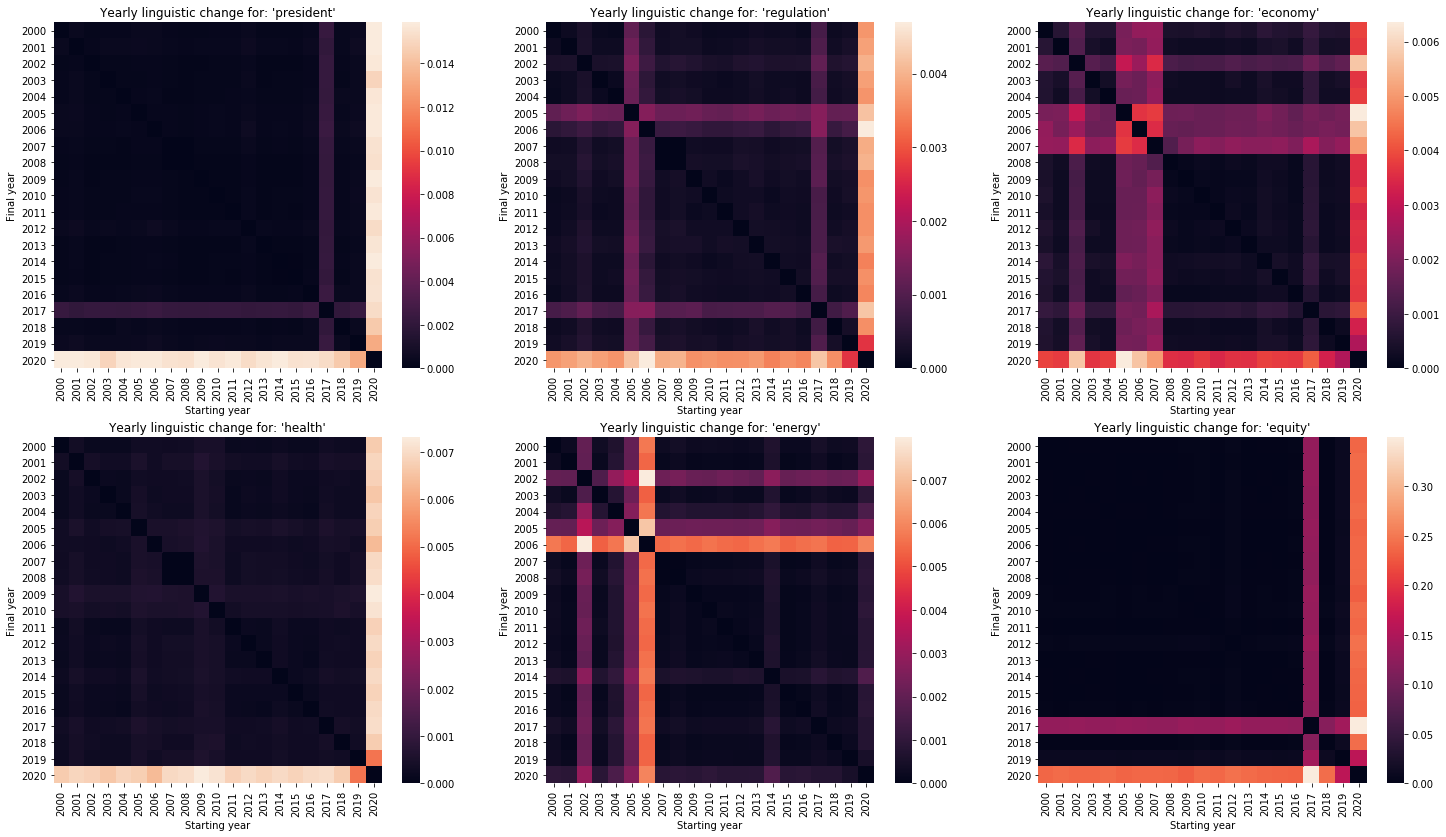

In [21]:
targetWords = ['president', 'regulation', 'economy', 'health', 'energy', 'equity']
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(25,14))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

for idx, targetWord in enumerate(targetWords):
    pltDF = getDivergenceDF(targetWord, datacomparedEmbeddings)
    seaborn.heatmap(pltDF, ax = axs[idx], annot = False) 
    axs[idx].set_xlabel("Starting year")
    axs[idx].set_ylabel("Final year")
    axs[idx].set_title("Yearly linguistic change for: '{}'".format(targetWord))

plt.show()
fig.savefig('SWEovertime.png', dpi=fig.dpi)